## 什么是加性模型(additive model)?

就是将几个分类函数加权相加的模型。
$$
H(\boldsymbol{x})=\sum_{t=1}^T \alpha_t h_t(\boldsymbol{x})
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

In [2]:
random_state=42

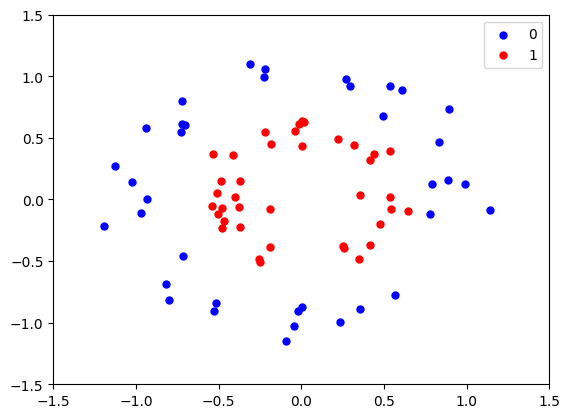

In [9]:
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=random_state)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=25, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=25, label='1')
plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.legend()

In [23]:
data = pd.DataFrame(np.c_[X, y], columns=['x1', 'x2', 'y'])
data.sort_values(by=['x1', 'x2', 'y'])

array([[0, 1, 2],
       [1, 0, 2],
       [1, 0, 2],
       [2, 1, 0],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [1, 0, 2],
       [2, 1, 0],
       [0, 1, 2],
       [0, 1, 2],
       [0, 2, 1],
       [0, 1, 2],
       [0, 2, 1],
       [0, 1, 2],
       [0, 1, 2],
       [1, 0, 2],
       [0, 1, 2],
       [1, 2, 0],
       [1, 0, 2],
       [0, 1, 2],
       [1, 0, 2],
       [1, 0, 2],
       [1, 0, 2],
       [1, 0, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1, 0, 2],
       [1, 0, 2],
       [0, 1, 2],
       [2, 1, 0],
       [1, 0, 2],
       [2, 0, 1],
       [2, 0, 1],
       [0, 1, 2],
       [1, 2, 0],
       [2, 1, 0],
       [0, 1, 2],
       [0, 2, 1],
       [0, 2, 1],
       [1, 0, 2],
       [0, 2, 1],
       [1, 0, 2],
       [0, 2, 1],
       [0, 1, 2],
       [0, 2, 1],
       [0, 1, 2],
       [0, 1, 2],
       [1, 0, 2],
       [0, 1, 2],
       [0, 1, 2],
       [1, 2, 0],
       [0, 1, 2],
       [0, 2, 1],
       [1, 0, 2],
       [1,

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((240, 2), (60, 2))

In [5]:
clf = LogisticRegression(max_iter=1000, random_state=42)

In [6]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"  系数: {clf.coef_}")
print(f"  截距: {clf.intercept_}")
print(classification_report(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

  系数: [[ 0.18605983 -0.03980644]]
  截距: [0.0029855]
              precision    recall  f1-score   support

           0       0.45      0.43      0.44        30
           1       0.45      0.47      0.46        30

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.45      0.45      0.45        60

F1: 0.45901639344262296


In [7]:
def visualize_results(X, y, model, title):
    """可视化决策边界"""
    plt.figure(figsize=(10, 8))

    # 创建网格点
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 预测网格点的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

    # 绘制数据点
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=25, label='0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=25, label='1')

    plt.title(title, fontsize=16)
    plt.xlim((-1.5, 1.5))
    plt.ylim((-1.5, 1.5))
    plt.legend()

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\xuhao\\.conda\\envs\\ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

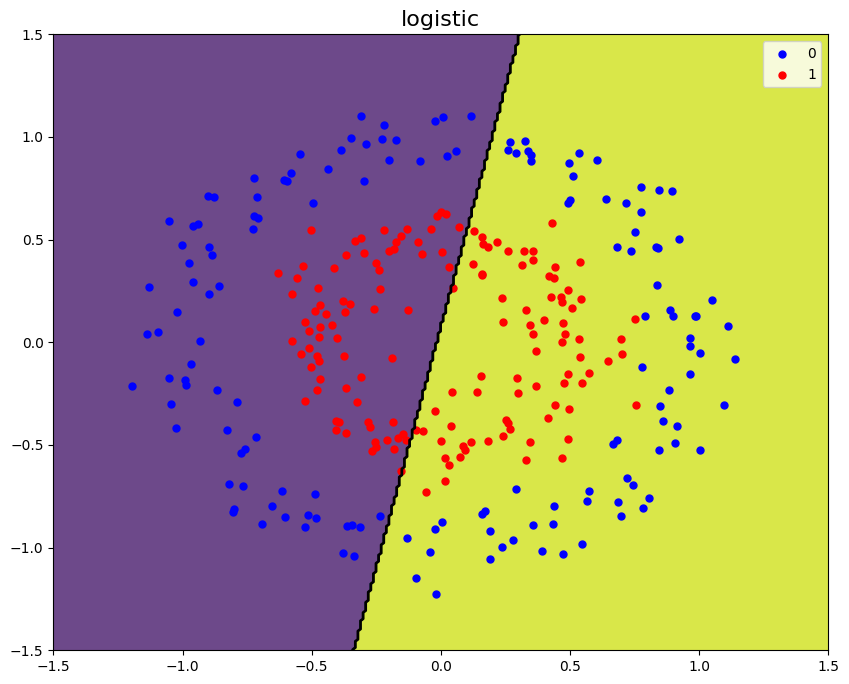

In [8]:
visualize_results(X, y, clf, 'logistic')

In [ ]:
class AdditiveLR():
    def __init__(self, n_models):
        self.n_models = n_models

    def fit(self, X, y):
        # 训练多个基础模型
        models = []
        for _ in range(self.n_models):
            # 添加一些随机扰动，使每个模型略有不同
            model = LogisticRegression()
            w = np.ones_like(y)
            s = randint(0, len(y))
            w[s:s + len(y) // self.n_models] = 0.0
            model.fit(X, y, sample_weight=w)
            models.append(model)
        self.models = models
        # 使用验证集优化权重
        from scipy.optimize import minimize

        def objective(weights):
            self.weights = weights
            probs = self.predict_prob(X)
            predictions = (probs > 0.5).astype(int)
            return -accuracy_score(y, predictions)  # 最小化负准确率 = 最大化准确率

        # 初始权重均匀分布
        initial_weights = np.random.rand(self.n_models)
        # initial_weights = np.ones(self.n_models) / self.n_models

        # 约束条件：所有权重之和为1
        constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

        # 边界条件：所有权重都在0和1之间
        bounds = [(0, 1) for _ in range(self.n_models)]

        # 优化权重
        result = minimize(objective, initial_weights, method='SLSQP',
                          constraints=constraints, bounds=bounds)
        weights = result.x / np.sum(result.x)  # 确保权重和为1
        self.weights = weights

    def predict_prob(self, X):
        weights = self.weights / np.sum(self.weights)  # 归一化
        predictions = np.zeros(X.shape[0])

        for i, model in enumerate(self.models):
            proba = model.predict_proba(X)[:, 1]
            predictions += weights[i] * proba
        return predictions

In [67]:
# 创建基础逻辑回归分类器
base_estimator = LogisticRegression(
    max_iter=10000,
    # random_state=42,
    solver='liblinear',  # 使用liblinear求解器确保正确处理样本权重
    C=1.0,  # 正则化强度
    class_weight='balanced'  # 平衡类别权重
)

# 创建并训练AdaBoost模型
ada = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=10,  # 增加分类器数量
    learning_rate=0.5,  # 降低学习率，使权重调整更平滑
    algorithm='SAMME',  # 使用SAMME算法，适合二分类问题
    random_state=42
)
    
ada.fit(X_train, y_train)
# 打印每个基础分类器的系数和权重
print("基础分类器系数和权重:")
for i, (clf, alpha) in enumerate(zip(ada.estimators_, ada.estimator_weights_)):
    print(f"分类器 {i + 1}:")
    print(f"  权重: {alpha:.4f}")
    print(f"  系数: {clf.coef_}")
    print(f"  截距: {clf.intercept_}")
    print()

基础分类器系数和权重:
分类器 1:
  权重: 0.0250
  系数: [[ 0.01380836 -0.00382973]]
  截距: [4.88647857e-05]

分类器 2:
  权重: 0.0127
  系数: [[ 0.01116663 -0.00310291]]
  截距: [-6.41797441e-06]

分类器 3:
  权重: 0.0064
  系数: [[ 0.00982678 -0.00272088]]
  截距: [8.61283635e-06]



In [68]:
y_pred2 = ada.predict(X_test)
print(classification_report(y_test, y_pred2))
print('F1:', f1_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        30
           1       0.45      0.50      0.48        30

    accuracy                           0.45        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.45      0.45      0.45        60

F1: 0.47619047619047616


In [69]:
for x, y in zip(y_pred, y_pred2):
    print(x == y)

True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True


<module 'matplotlib.pyplot' from 'C:\\Users\\xuhao\\.conda\\envs\\ml\\lib\\site-packages\\matplotlib\\pyplot.py'>

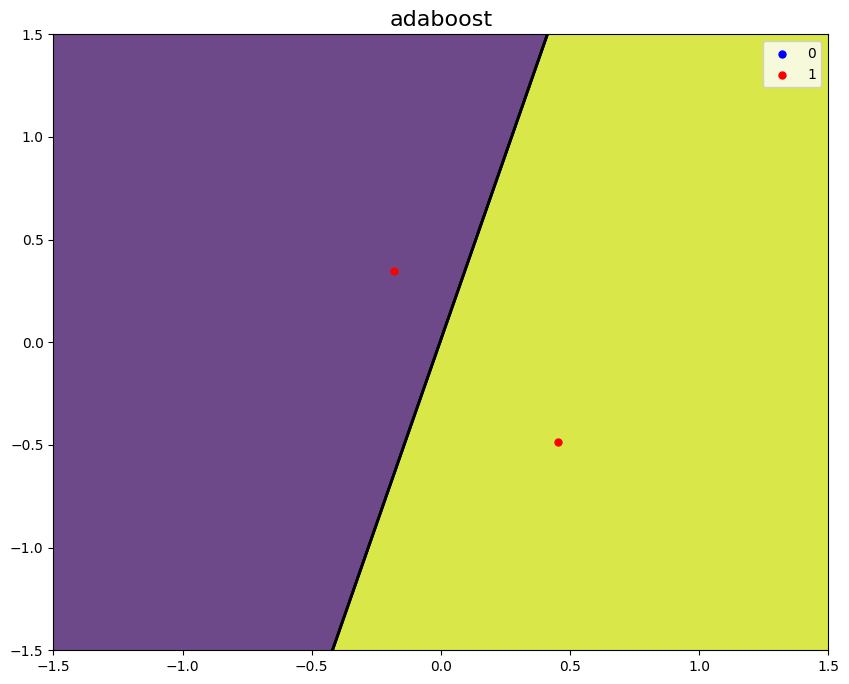

In [72]:
visualize_results(X, y, ada, 'adaboost')